In [1]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from  skimage.filters import gaussian
from tqdm.notebook import trange, tqdm
import pandas as pd
from objects import movie_structure
from objects.movie_structure import gaussian_curvature, mean_curvature
import correlations_exec
from preprocessing import preprocessing
import importlib
import seaborn as sns
import utils.graph_utils as graph_utils
import json

# Loading a JSON file
def load_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

# Saving data to a JSON file
def save_json(data, file_path):
    with open(file_path, 'w') as file:
        json.dump(data, file, indent=4)

{'data_path': 'C:\\Users\\amityu\\Gel_Sheet_Data\\Control 050721\\\\', 'name': 'Control 05/07/21'}


In [11]:
#movie = 'CCA60'
#movie = 'control'
movie ='140721'

DATA_PATH = 'C:/Users/amityu/Gel_Sheet_Data/'
MOVIE_PATH = DATA_PATH +  movie + '/'
GRAPH_PATH = 'C:/Users/amityu/Gel_Sheet_Graph/'
gel_data = load_json(DATA_PATH + 'global/%s.json'%movie)

In [55]:
#reload modoule if changed
importlib.reload(movie_structure)

<module 'objects.movie_structure' from 'C:\\Users\\amityu\\DataspellProjects\\gel_sheets\\objects\\movie_structure.py'>

In [66]:
gel = movie_structure.Movie.from_plate_and_height(gel_data)


In [4]:
import json

# Loading a JSON file
def load_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

# Saving data to a JSON file
def save_json(data, file_path):
    with open(file_path, 'w') as file:
        json.dump(data, file, indent=4)

# Example usage
file_path = r'C:\Users\amityu\Gel_Sheet_Data\global\control.txt'
output_path = r'C:\Users\amityu\Gel_Sheet_Data\global\control.json'
# Loading a JSON file
loaded_data = {
    "data_path": r'C:\Users\amityu\Gel_Sheet_Data\Control 050721\\',
    "name":      "Control 05/07/21"
}

print(loaded_data)

# Modifying the data
#loaded_data['new_key'] = 'new_value'

# Saving the modified data to a JSON file
save_json(loaded_data, output_path)


{'data_path': 'C:\\Users\\amityu\\Gel_Sheet_Data\\Control 050721\\\\', 'name': 'Control 05/07/21'}


In [71]:
def plane_correlation(plane1, plane2):
    f1 = plane1.flatten()
    f2 = plane2.flatten()
    mask_plane = ~np.bitwise_or(np.isnan(f1), np.isnan(f2))
    f1 = f1[mask_plane]
    f2 = f2[mask_plane]
    c = np.sum(f1 * f2) / (np.sum(f1*f1)**0.5 * np.sum(f2*f2)**0.5) #np.corrcoef(f1,f2)[0,1]
    return c

COrrelation between the intensity in the plane and surface as a function of time

In [77]:

correlation_list = []
time_list = []
mean_height_list = []
for tp in tqdm(gel.tp_list[0:-1:1]):
    try:
        plate = tp.get_plate_plane()
        height = tp.get_height_plane()
        correlation_list.append(plane_correlation(plate, height))
        time_list.append(tp.time)
        mean_height_list.append(np.nanmean(tp.height))
    except:
        pass


  0%|          | 0/36 [00:00<?, ?it/s]

C:\Users\amityu\AppData\Local\Temp\ipykernel_29372\430027464.py:7: RuntimeWarning: invalid value encountered in scalar divide
  c = np.sum(f1 * f2) / (np.sum(f1*f1)**0.5 * np.sum(f2*f2)**0.5) #np.corrcoef(f1,f2)[0,1]
C:\Users\amityu\AppData\Local\Temp\ipykernel_29372\2119859397.py:10: RuntimeWarning: Mean of empty slice
  mean_height_list.append(np.nanmean(tp.height))


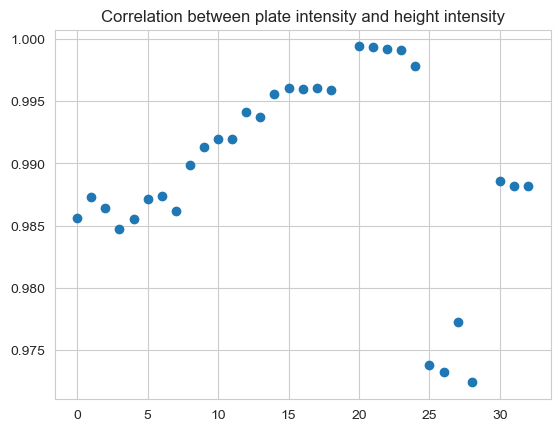

In [78]:

plt.scatter(time_list, correlation_list)
plt.title('Correlation between plate intensity and height intensity')
plt.show()

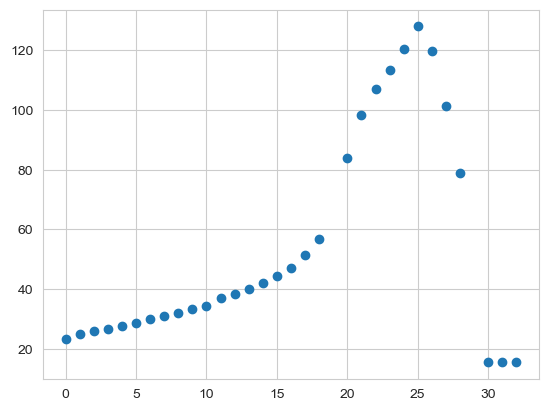

In [79]:

plt.scatter(time_list, mean_height_list)

plt.show()


correlation between intensity of plate and height of surface as a function of time


  0%|          | 0/36 [00:00<?, ?it/s]

C:\Users\amityu\AppData\Local\Temp\ipykernel_29372\430027464.py:7: RuntimeWarning: invalid value encountered in scalar divide
  c = np.sum(f1 * f2) / (np.sum(f1*f1)**0.5 * np.sum(f2*f2)**0.5) #np.corrcoef(f1,f2)[0,1]
C:\Users\amityu\AppData\Local\Temp\ipykernel_29372\1814023617.py:10: RuntimeWarning: Mean of empty slice
  mean_height_list.append(np.nanmean(tp.height))


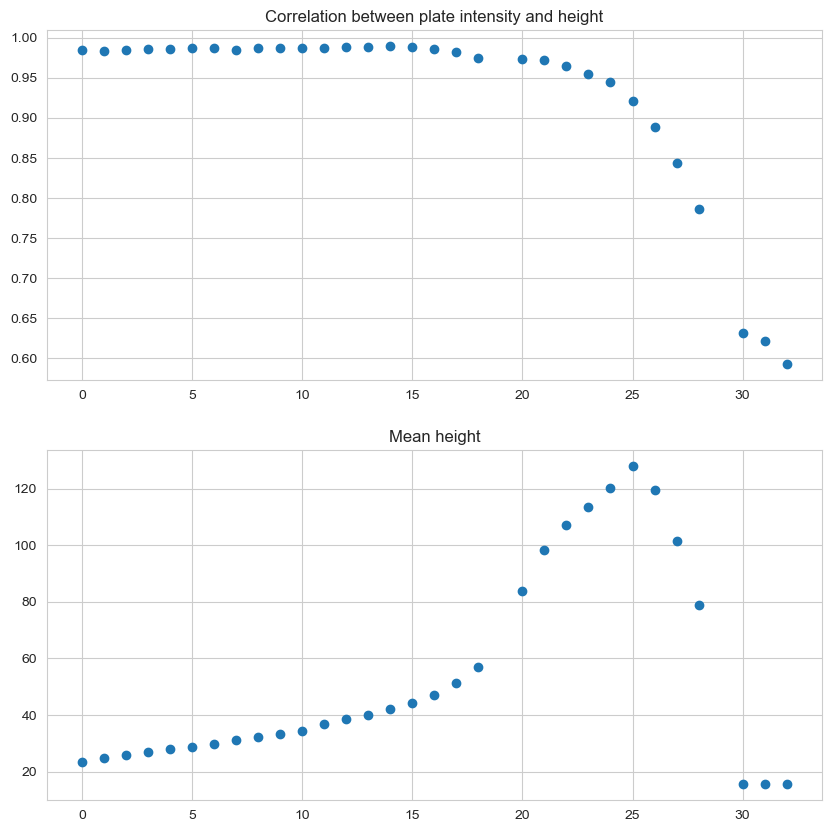

In [80]:
correlation_list = []
time_list = []
mean_height_list = []
for tp in tqdm(gel.tp_list[0:-1:1]):
    try:
        plate = tp.get_plate_plane()
        height = tp.get_height_plane()
        correlation_list.append(plane_correlation(plate, tp.height))
        time_list.append(tp.time)
        mean_height_list.append(np.nanmean(tp.height))
    except:
        pass


#make subplots
fig, ax = plt.subplots(2,1, figsize = (10,10))
ax[0].scatter(time_list, correlation_list)
ax[0].set_title('Correlation between plate intensity and height')
ax[1].scatter(time_list, mean_height_list)
ax[1].set_title('Mean height')
plt.show()


Correlation between plate intensity and height after a time gap


C:\Users\amityu\AppData\Local\Temp\ipykernel_29372\430027464.py:7: RuntimeWarning: invalid value encountered in scalar divide
  c = np.sum(f1 * f2) / (np.sum(f1*f1)**0.5 * np.sum(f2*f2)**0.5) #np.corrcoef(f1,f2)[0,1]


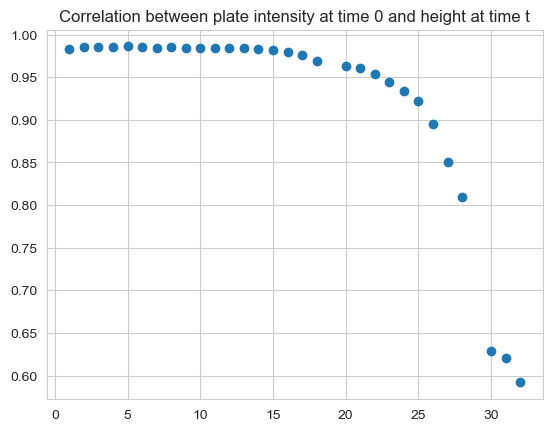

In [72]:
correlation_list = []
time_list = []
tp_list = gel.tp_list
t0_plate_intensity = tp_list[0].get_plate_plane()
for t in range(1, len(tp_list)):
    t1_height = tp_list[t].height
    correlation_list.append(plane_correlation(t0_plate_intensity, t1_height))
    time_list.append(tp_list[t].time)


plt.scatter(time_list, correlation_list)
plt.title('Correlation between plate intensity at time 0 and height at time t')
plt.show()




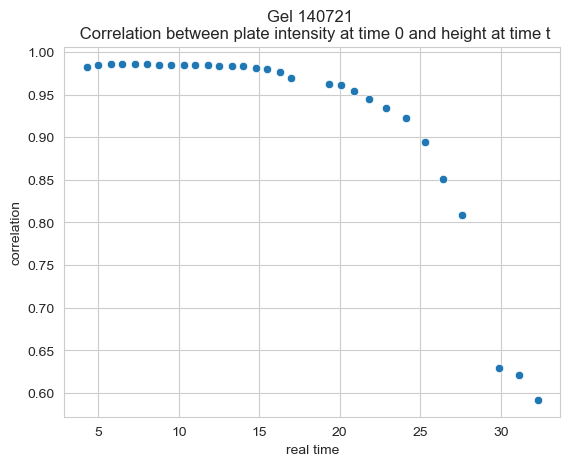

In [76]:
import pandas as pd
df = pd.DataFrame({'time': time_list, 'correlation': correlation_list})
df = graph_utils.add_time_to_df(df, gel_data)
sns.scatterplot(data = df, x = 'real time', y = 'correlation')
plt.title('Gel %s \n Correlation between plate intensity at time 0 and height at time t'%gel_data['name'])

plt.show()

In [ ]:
#force load the module
import importlib
importlib.reload(correlations_exec)

NameError: name 'correlations_exec' is not defined

In [2]:
import correlations_exec

movie_list = ['100621', 'control', '140721', '150721', '130721']
DATA_PATH = 'C:/Users/amityu/Gel_Sheet_Data/'
GRAPH_PATH = 'C:/Users/amityu/Gel_Sheet_Graph/'
for movie in movie_list:
    print(movie)
    gel_data = load_json(DATA_PATH + 'global/%s.json'%movie)
    gel = movie_structure.Movie.from_plate_and_height(gel_data)
    correlations_exec.plate_i_surface_i_correlation(gel)
    correlations_exec.plate_i_surface_h_correlation(gel)
    correlations_exec.plate_i_surface_h_correlation_after_time(gel, gel_data)


100621


  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]